Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv
dataset.Determine the number of clusters using the elbow method.
Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/Tanmay49/SEM7/main/ML/sales_data_sample.csv', encoding ="unicode_escape")


In [16]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [17]:
df = df[['QUANTITYORDERED','PRICEEACH','PRICEEACH']]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = scaler.fit_transform(df)
df_scale

array([[-0.52289086,  0.5969775 ,  0.5969775 ],
       [-0.11220131, -0.11445035, -0.11445035],
       [ 0.60650538,  0.54938372,  0.54938372],
       ...,
       [ 0.81185016,  0.81015797,  0.81015797],
       [-0.11220131, -1.06186404, -1.06186404],
       [ 1.2225397 , -0.89925195, -0.89925195]])

In [20]:
from sklearn.cluster import KMeans 
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i).fit(df_scale)
    wcss.append(kmean.inertia_)

c:\python37\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python37\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python37\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python37\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python37\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` w

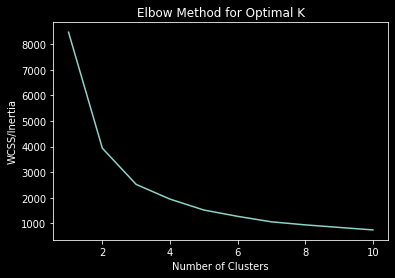

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS/Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [23]:

k = 3
kmeans = KMeans(n_clusters=k,random_state=42)
df['cluster'] = kmeans.fit_predict(df_scale)
df 

c:\python37\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,QUANTITYORDERED,PRICEEACH,PRICEEACH,cluster
0,30,95.70,95.70,2
1,34,81.35,81.35,2
2,41,94.74,94.74,0
3,45,83.26,83.26,0
4,49,100.00,100.00,0
...,...,...,...,...
2818,20,100.00,100.00,2
2819,29,100.00,100.00,2
2820,43,100.00,100.00,0
2821,34,62.24,62.24,1
